In [1]:
# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)



In [2]:
#loadind data
df= pd.read_csv(r'kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape


(400, 26)

In [5]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [6]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [7]:
df.head(300)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,44.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,106.0,25.0,0.9,150.0,3.6,15.0,50,9600,6.5,no,no,no,good,no,no,notckd
296,41.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,125.0,38.0,0.6,140.0,5.0,16.8,41,6300,5.9,no,no,no,good,no,no,notckd
297,53.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,116.0,26.0,1.0,146.0,4.9,15.8,45,7700,5.2,NaN,NaN,NaN,good,no,no,notckd
298,34.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,91.0,49.0,1.2,135.0,4.5,13.5,48,8600,4.9,no,no,no,good,no,no,notckd


In [8]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [10]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [13]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [14]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [15]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [16]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



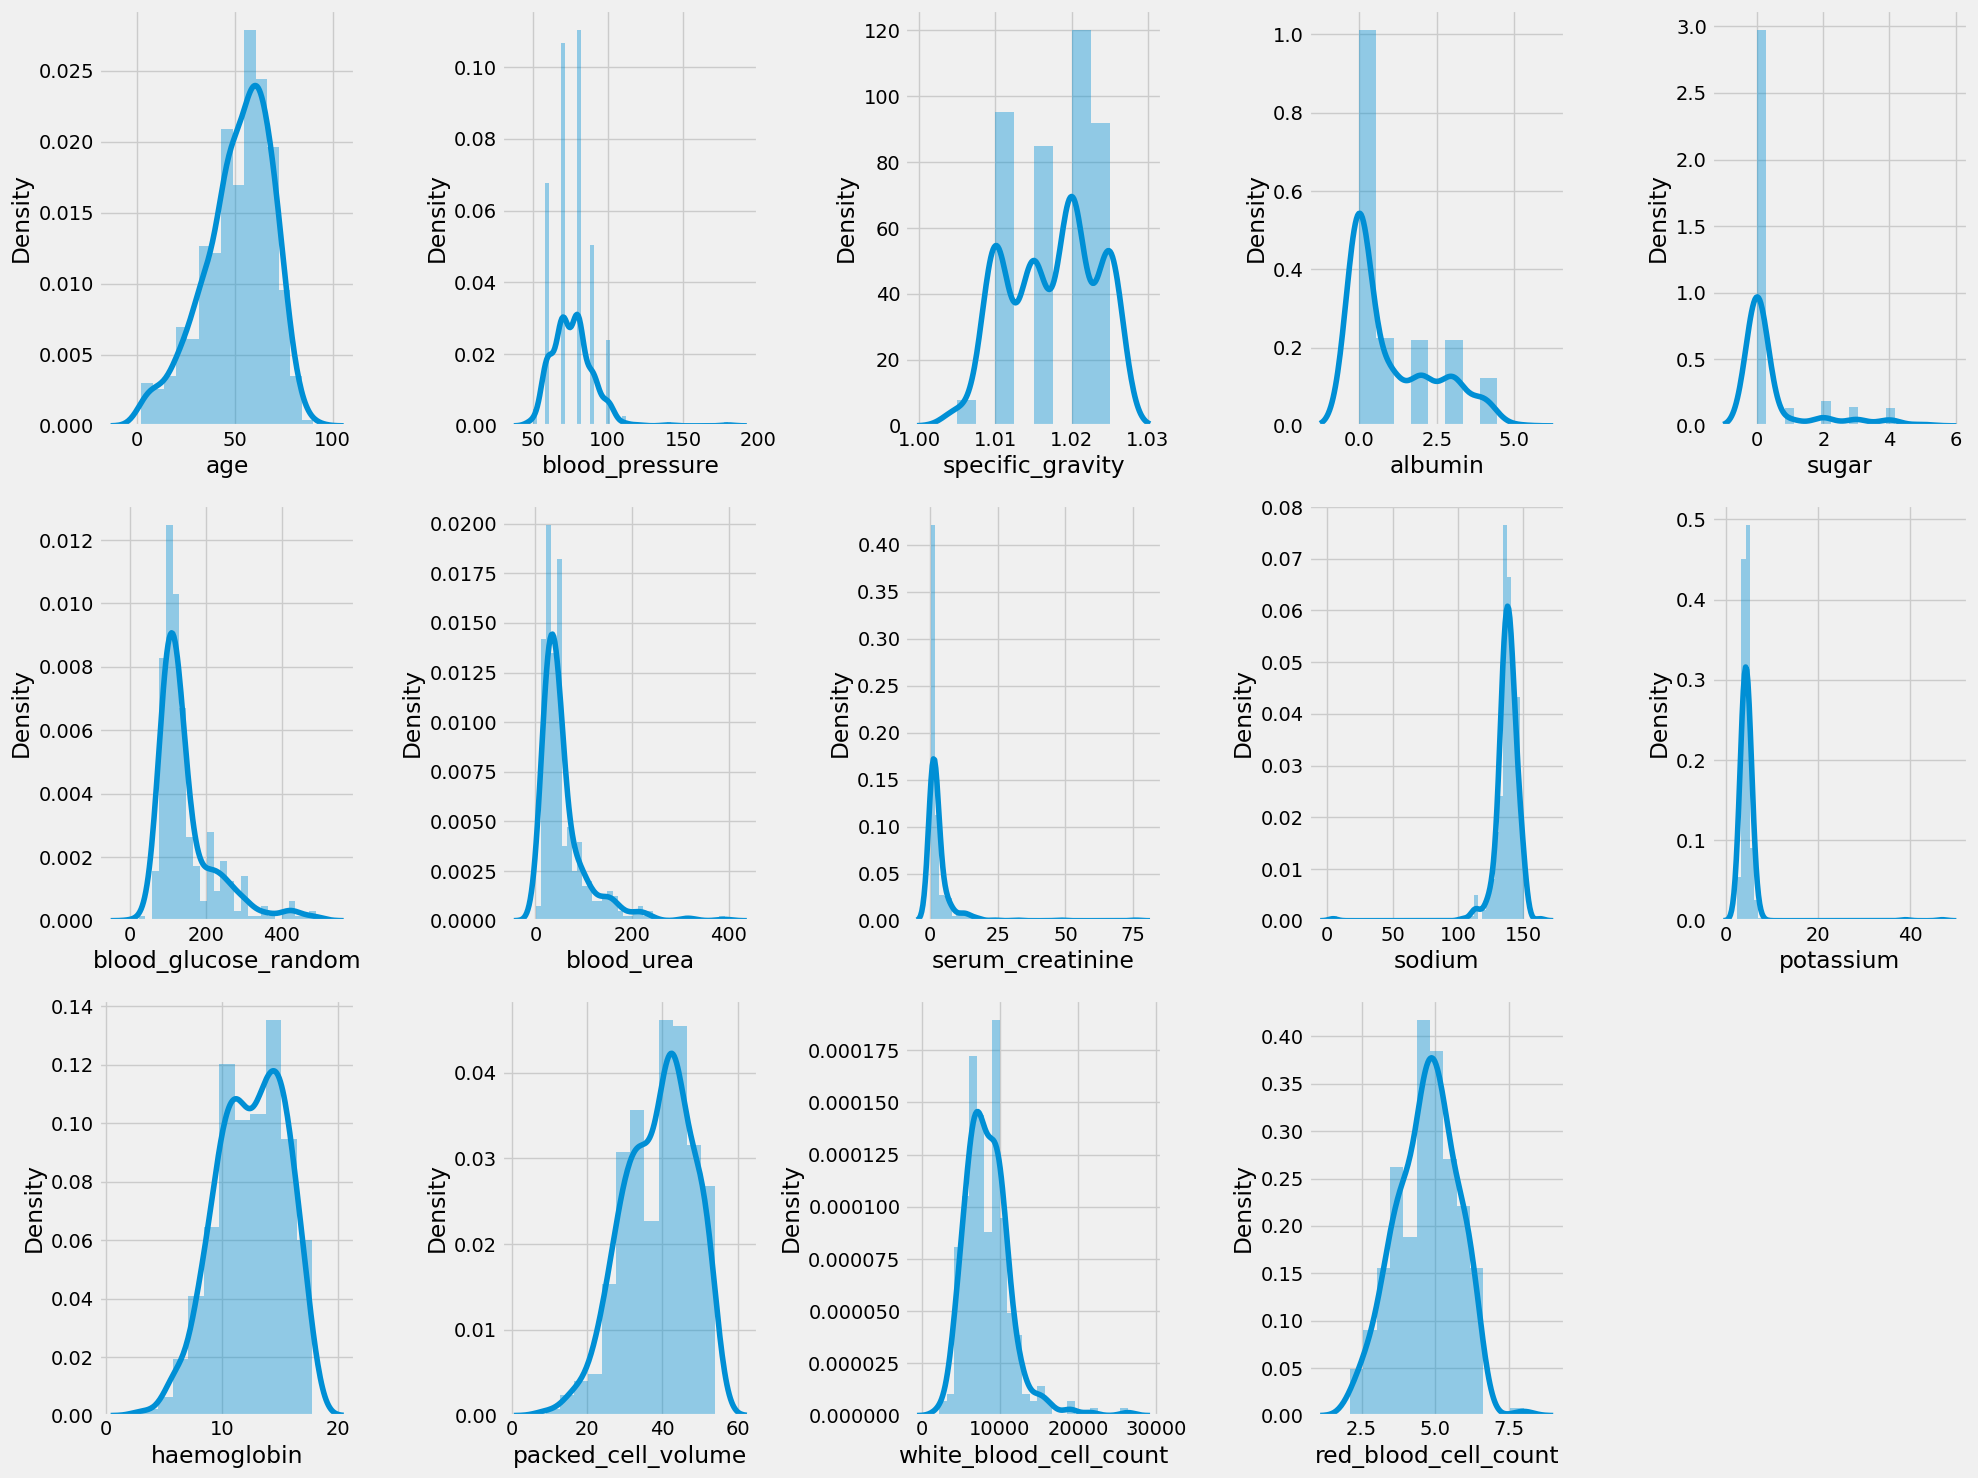

In [17]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

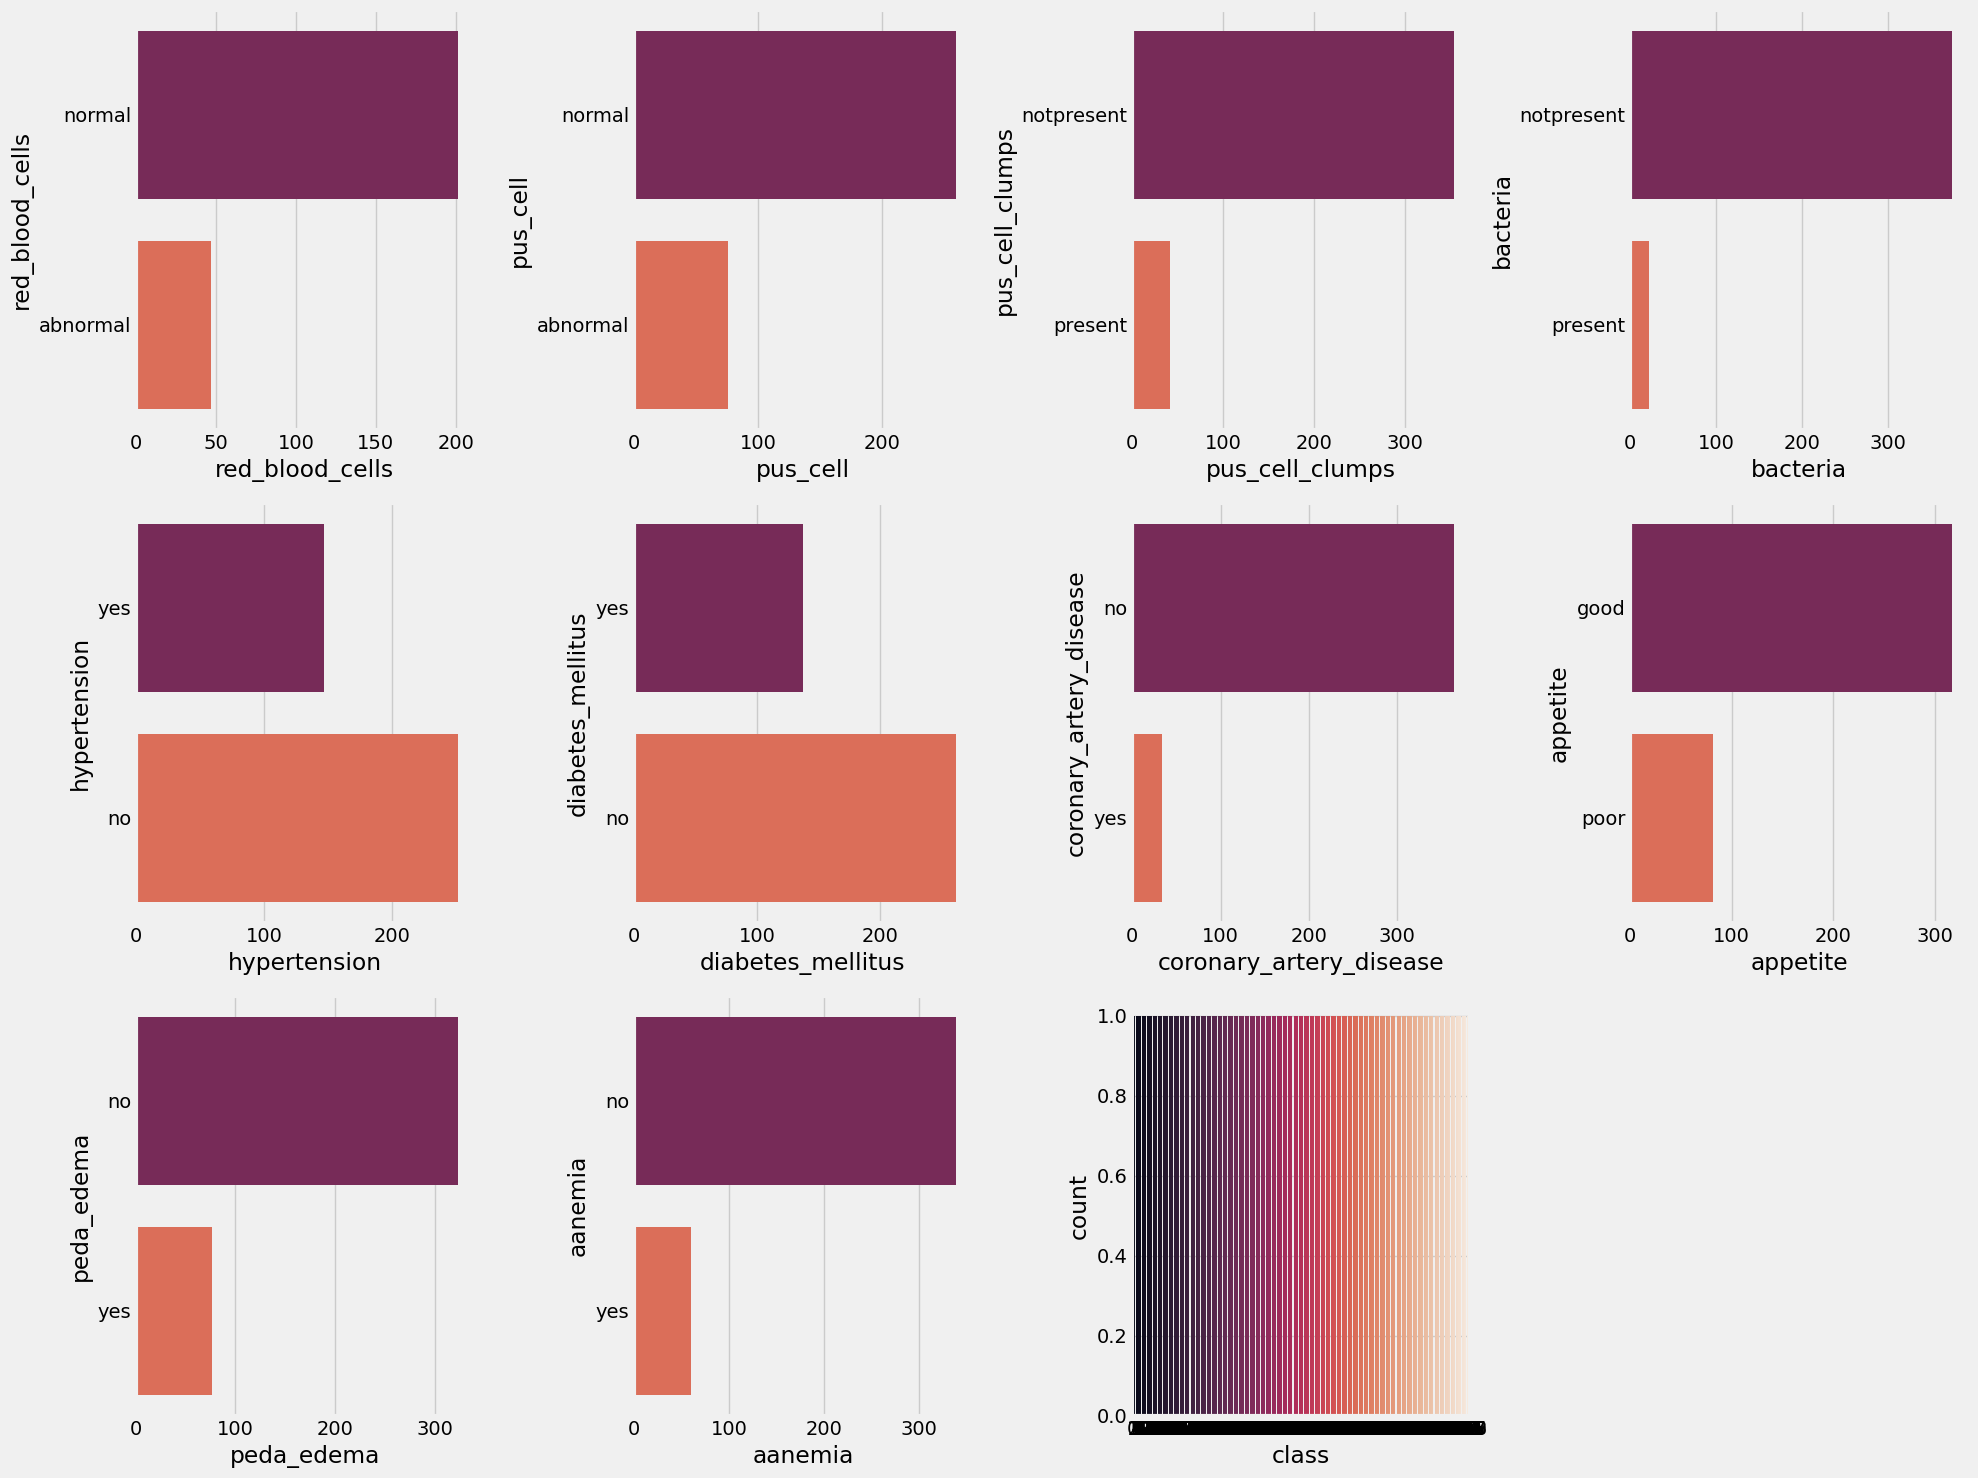

In [18]:
# looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

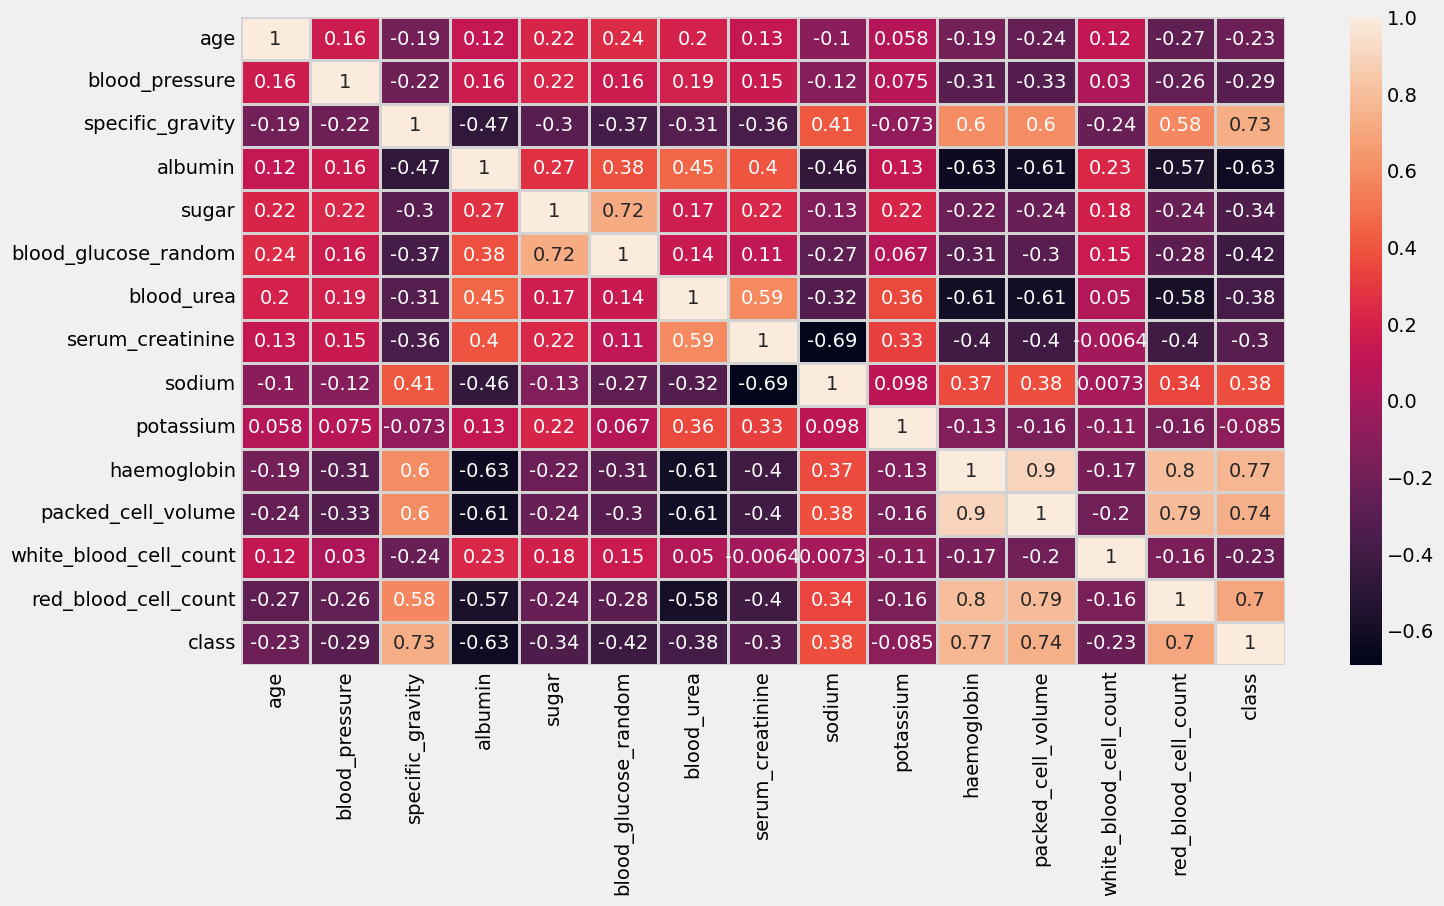

In [19]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [20]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

###### DATA PREPROCESSING

In [21]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [22]:
df[num_cols].isnull().sum()


age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [23]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [24]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [25]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [26]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [27]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [28]:
####FEATURE ENCODING

In [29]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [30]:
##AS all of the categories columns have 2 categories we use label encoder

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,130.0,5.2,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,105.0,18.0,0.8,135.0,3.8,11.3,38.0,6000.0,3.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,139.0,3.8,9.6,31.0,7500.0,3.7,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,131.0,5.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [33]:
df.shape

(400, 25)

In [34]:
###MODEL BUILDING

In [35]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [36]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [37]:
X_train

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
92,71.0,70.0,1.010,3.0,0.0,1,0,1,1,219.0,82.0,3.6,133.0,4.4,10.4,33.0,5600.0,3.6,1,1,1,0,0,0
223,71.0,90.0,1.010,0.0,3.0,1,1,0,0,303.0,30.0,1.3,136.0,4.1,13.0,38.0,9200.0,4.6,1,1,0,0,0,0
234,37.0,100.0,1.010,0.0,0.0,0,1,0,0,148.0,19.0,1.3,142.0,4.2,15.0,44.0,4100.0,5.2,1,0,0,0,0,0
232,50.0,90.0,1.015,1.0,0.0,0,0,0,0,172.0,29.0,0.9,125.0,4.0,6.6,42.0,6300.0,4.9,0,0,0,0,1,0
377,64.0,70.0,1.020,0.0,0.0,1,1,0,0,97.0,27.0,0.7,145.0,4.8,13.8,49.0,6400.0,4.8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,43.0,80.0,1.025,0.0,0.0,1,1,0,0,130.0,30.0,1.1,143.0,5.0,15.9,45.0,7800.0,4.5,0,0,0,0,0,0
192,46.0,110.0,1.015,0.0,0.0,1,1,0,0,130.0,16.0,0.9,139.0,5.0,16.5,48.0,4300.0,3.9,0,0,0,0,0,0
117,12.0,70.0,1.020,0.0,0.0,1,1,0,0,219.0,36.0,1.3,139.0,3.7,12.5,37.0,9800.0,4.4,0,0,0,0,0,0
47,11.0,80.0,1.010,3.0,0.0,1,1,0,0,138.0,17.0,0.8,137.0,4.5,15.0,45.0,8600.0,5.3,0,0,0,0,0,0


In [38]:
y_train

92     0
223    0
234    0
232    0
377    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: class, Length: 280, dtype: int64

In [39]:
##KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7928571428571428
Test Accuracy of KNN is 0.7 

Confusion Matrix :- 
[[55 17]
 [19 29]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        72
           1       0.63      0.60      0.62        48

    accuracy                           0.70       120
   macro avg       0.69      0.68      0.69       120
weighted avg       0.70      0.70      0.70       120



In [41]:
##Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

SEED = 23

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of GradientBoosting

gbc_acc=accuracy_score(y_test, gbc.predict(X_test))

print(f"Training Accuracy of GradientBoosting is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Test Accuracy of GradientBoosting is {gbc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gbc.predict(X_test))}")

Training Accuracy of GradientBoosting is 1.0
Test Accuracy of GradientBoosting is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [43]:
##Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of GradientBoosting

gnb_acc=accuracy_score(y_test, gnb.predict(X_test))

print(f"Training Accuracy of Gaussian Naive Bayes is {accuracy_score(y_train, gnb.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes is {gnb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gnb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gnb.predict(X_test))}")

Training Accuracy of Gaussian Naive Bayes is 0.9714285714285714
Test Accuracy of Gaussian Naive Bayes is 0.95 

Confusion Matrix :- 
[[71  1]
 [ 5 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.98      0.90      0.93        48

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [45]:
##AdaBoost

In [46]:
from sklearn.ensemble import AdaBoostClassifier 
import warnings 
warnings.filterwarnings("ignore") 

adb = AdaBoostClassifier() 
adb_model = adb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of GradientBoosting

adb_acc=accuracy_score(y_test, adb.predict(X_test))

print(f"Training Accuracy of Gaussian Naive Bayes is {accuracy_score(y_train, adb.predict(X_train))}")
print(f"Test Accuracy of Gaussian Naive Bayes is {gnb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, adb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, adb.predict(X_test))}")

Training Accuracy of Gaussian Naive Bayes is 1.0
Test Accuracy of Gaussian Naive Bayes is 0.95 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [47]:
##Support vector machine

In [48]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

svm_model = svm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of GradientBoosting

svm_acc=accuracy_score(y_test, svm.predict(X_test))

print(f"Training Accuracy of Support vector machine is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Test Accuracy of Support vector machine is {svm_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of Support vector machine is 1.0
Test Accuracy of Support vector machine is 0.6 

Confusion Matrix :- 
[[72  0]
 [48  0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.60      1.00      0.75        72
           1       0.00      0.00      0.00        48

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120



In [49]:
##DECISION TREE 

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)



DecisionTreeClassifier()

In [51]:
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[70  2]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [52]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [53]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7, 'splitter': 'best'}
0.9892857142857142


In [54]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9785714285714285
Test Accuracy of Decision Tree Classifier is 0.9166666666666666 

Confusion Matrix :- 
[[70  2]
 [ 8 40]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        72
           1       0.95      0.83      0.89        48

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



In [55]:
##RANDOM FOREST CLASSIFIER

In [56]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [57]:
##EXTRA TREES CLASSIFIER

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [59]:
##MODEL COMPARISON

In [60]:
models = pd.DataFrame({
    'Model' : [ 'knn', 'Gradient Boosting' ,'Gaussian Naive Bayes', 'AdaBoost','Support vector machine','Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier'],
    'Score' : [knn_acc, gbc_acc ,gnb_acc,adb_acc,svm_acc, dtc_acc, rd_clf_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Random Forest Classifier,0.975000
1,Gradient Boosting,0.966667
3,AdaBoost,0.966667
7,Extra Trees Classifier,0.966667
2,Gaussian Naive Bayes,0.950000
5,Decision Tree Classifier,0.916667
0,knn,0.700000
4,Support vector machine,0.600000


In [61]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [62]:

# Sorting the models DataFrame based on the 'Score' column in descending order
sorted_models = models.sort_values(by='Score', ascending=False)

# Finding the index of the row with the highest score
max_score_index = sorted_models['Score'].idxmax()

# Extracting the model name and score with the highest accuracy
max_score_model_name = sorted_models.loc[max_score_index, 'Model']
max_score = sorted_models.loc[max_score_index, 'Score']

print("Model with Max Score:", max_score_model_name)
print("Max Score:", max_score)

# Mapping model names to abbreviations
model_abbreviations = {'AdaBoost': 'adb', 'Random Forest Classifier': 'rd_clf', 'Extra Trees Classifier': 'etc',
                       'Gradient Boosting': 'gbc', 'Decision Tree Classifier': 'dtc', 'Gaussian Naive Bayes': 'gnb',
                       'KNN': 'knn', 'Support vector machine': 'svm'}

# Finding the abbreviation for the model with the highest score



Model with Max Score: Random Forest Classifier
Max Score: 0.975


In [63]:
if max_score_model_name in model_abbreviations:
    max_score_model_abbreviation = model_abbreviations[max_score_model_name]
    print(max_score_model_abbreviation)
else:
    print("Model name not found in the dictionary.")

rd_clf


In [64]:
import pickle
pickle.dump(max_score_model_abbreviation, open("model.pkl", "wb"))

In [65]:
X_train

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
92,71.0,70.0,1.010,3.0,0.0,1,0,1,1,219.0,82.0,3.6,133.0,4.4,10.4,33.0,5600.0,3.6,1,1,1,0,0,0
223,71.0,90.0,1.010,0.0,3.0,1,1,0,0,303.0,30.0,1.3,136.0,4.1,13.0,38.0,9200.0,4.6,1,1,0,0,0,0
234,37.0,100.0,1.010,0.0,0.0,0,1,0,0,148.0,19.0,1.3,142.0,4.2,15.0,44.0,4100.0,5.2,1,0,0,0,0,0
232,50.0,90.0,1.015,1.0,0.0,0,0,0,0,172.0,29.0,0.9,125.0,4.0,6.6,42.0,6300.0,4.9,0,0,0,0,1,0
377,64.0,70.0,1.020,0.0,0.0,1,1,0,0,97.0,27.0,0.7,145.0,4.8,13.8,49.0,6400.0,4.8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,43.0,80.0,1.025,0.0,0.0,1,1,0,0,130.0,30.0,1.1,143.0,5.0,15.9,45.0,7800.0,4.5,0,0,0,0,0,0
192,46.0,110.0,1.015,0.0,0.0,1,1,0,0,130.0,16.0,0.9,139.0,5.0,16.5,48.0,4300.0,3.9,0,0,0,0,0,0
117,12.0,70.0,1.020,0.0,0.0,1,1,0,0,219.0,36.0,1.3,139.0,3.7,12.5,37.0,9800.0,4.4,0,0,0,0,0,0
47,11.0,80.0,1.010,3.0,0.0,1,1,0,0,138.0,17.0,0.8,137.0,4.5,15.0,45.0,8600.0,5.3,0,0,0,0,0,0


In [66]:
adb.predict(X_train)

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [67]:
import numpy as np
input_datas = np.array([[64.0,70.0,1.020,0.0,0.0,1,1,0,0,97.0,27.0,0.7,145.0,4.8,13.8,49.0,6400.0,4.8,0,0,0,0,0,0]])

# Make predictions using the model
predictions = adb.predict(input_datas)

# Print the predicted output
print("Predicted output:", predictions)

Predicted output: [1]


In [68]:
import numpy as np
input_datas = np.array([[71.0,70.0,1.010,3.0,0.0,1,0,1,1,219.0,82.0,3.6,133.0,4.4,10.4,33.0,5600.0,3.6,1,1,1,0,0,0]])

# Make predictions using the model
predictions = adb.predict(input_datas)

# Print the predicted output
print("Predicted output:", predictions)

Predicted output: [0]
